- Title: SQL from a Jupyter notebook
- Slug: sql_jupyter_basics
- Summary: SQL from a Jupyter notebook
- Date: 2017-04-01 12:00
- Category:
- Tags: sql
- Authors: James Loach

### Setup

* Download ipython-sql from [here](https://github.com/catherinedevlin/ipython-sql) 
or use `pip install ipython-sql`
* Download Iris dataset in `csv` format from [here](https://archive.ics.uci.edu/ml/datasets/Iris)
* Install `postgresql` locally

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

### SQL magic

Load the sql extension

In [2]:
%load_ext sql

Connect to the database

In [3]:
%sql postgresql://jloach@/

'Connected: jloach@'

Load some data into a DataFrame and put it in the database

In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
iris = pd.read_csv('iris.csv', names=column_names)
%sql DROP TABLE iris
%sql PERSIST iris

Done.


'Persisted iris'

In [5]:
%%sql
SELECT * 
FROM iris 
LIMIT 3

3 rows affected.


index,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
result = _

In [7]:
result = %sql SELECT * FROM iris
print(result.keys)
print(result[0].target)
print(result[0][1])

150 rows affected.
['index', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
Iris-setosa
5.1


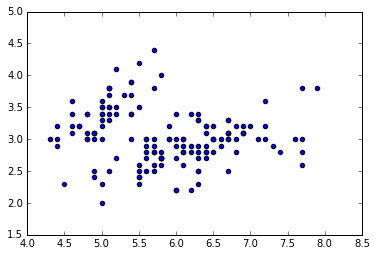

In [8]:
df = result.DataFrame()
df.groupby('target')
plt.scatter(df.sepal_length, df.sepal_width)